# Import

In [117]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score,confusion_matrix, classification_report, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.cluster import KMeans
#from tensorflow.keras.datasets import mnist
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.metrics import silhouette_score

In [2]:
df_abn = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_abnormal.csv", header=None)
df_n = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_normal.csv", header=None)

In [3]:
df1 = df_abn
df2 = df_n

# Perform EDA

In [5]:
df_abn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB


In [ ]:
df_abn

In [5]:
df_abn.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,...,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.0,10506.0
mean,0.975468,0.725582,0.438306,0.290384,0.252897,0.249423,0.245668,0.247160,0.250203,0.252396,...,0.001055,0.001057,0.000744,0.000554,0.000533,0.000313,0.000070,0.000074,0.0,1.0
std,0.036354,0.199030,0.262699,0.270977,0.237004,0.211751,0.200159,0.194840,0.193160,0.192341,...,0.022312,0.022585,0.017557,0.013781,0.013553,0.010901,0.003754,0.004044,0.0,0.0
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.957325,0.586602,0.236455,0.074064,0.088487,0.101422,0.097175,0.096331,0.098527,0.098041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,1.000000,0.745646,0.404297,0.212845,0.173046,0.180927,0.182782,0.191793,0.197088,0.200919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,1.000000,0.890043,0.620889,0.427811,0.343089,0.327582,0.328089,0.347707,0.359378,0.370106,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.265025,0.279310,0.0,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


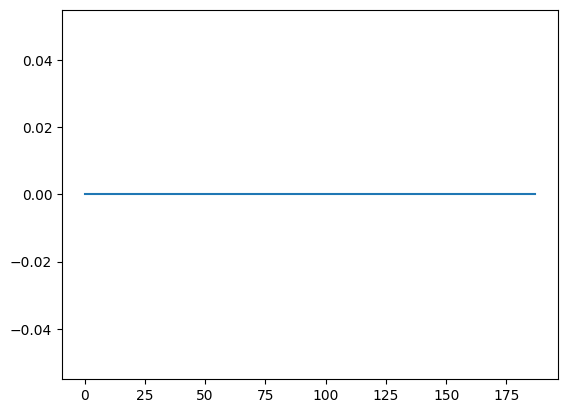

In [6]:
df_abn.isnull().sum().plot().legend().set_visible(False)

In [ ]:
df_n


In [11]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


In [7]:
df_n.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,...,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.0,4046.0
mean,0.979670,0.711486,0.311677,0.119575,0.088608,0.130843,0.159653,0.165608,0.168005,0.170783,...,0.001540,0.001332,0.001304,0.001220,0.000991,0.000894,0.000454,0.000474,0.0,0.0
std,0.029061,0.186376,0.183457,0.110457,0.075760,0.081104,0.090131,0.096094,0.102506,0.106190,...,0.018664,0.016234,0.016668,0.016658,0.015204,0.015311,0.010834,0.011202,0.0,0.0
min,0.782178,0.121784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.964468,0.580160,0.164112,0.028731,0.027735,0.070776,0.094656,0.098848,0.095594,0.094988,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,0.726449,0.303266,0.092655,0.079476,0.121144,0.134312,0.142771,0.143002,0.145068,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,0.863699,0.436091,0.187527,0.134861,0.183746,0.216203,0.217895,0.220572,0.223053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.985955,0.910798,0.846591,0.770205,0.754524,0.749095,0.729192,0.700844,...,0.415879,0.361283,0.383522,0.407025,0.446281,0.483471,0.371502,0.376668,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


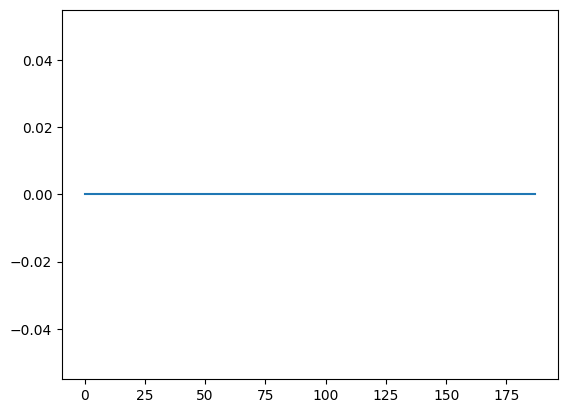

In [8]:
df_n.isnull().sum().plot().legend().set_visible(False)

In [9]:
df_abn_n = pd.concat([df_abn, df_n], axis=0)
df_abn_n

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_abn_n = df_abn_n.sample(frac=1).reset_index(drop=True)

In [18]:
df_abn_n

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.927922,0.608722,0.253180,0.140521,0.111448,0.072683,0.072078,0.039976,0.055724,0.059964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.988517,0.825837,0.083892,0.069537,0.052313,0.013716,0.003828,0.001276,0.000000,0.002871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.877725,0.594740,0.496067,0.394471,0.340751,0.279389,0.235334,0.233985,0.228815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.987891,0.480659,0.268416,0.044736,0.000000,0.059199,0.121090,0.118399,0.118399,0.120753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.905660,0.876128,0.882691,0.849877,0.854799,0.754717,0.741591,0.726825,0.723544,0.716161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.934852,0.473621,0.095124,0.031575,0.087530,0.134293,0.111111,0.106715,0.107514,0.103118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14548,1.000000,0.369954,0.007074,0.067416,0.108614,0.108614,0.109447,0.107782,0.104453,0.097794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14549,0.922985,0.821588,0.630390,0.439191,0.267916,0.156705,0.094261,0.087422,0.083556,0.074338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.561591,0.403977,0.265276,0.211930,0.160524,0.100388,0.084384,0.075655,0.067895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
df_abn_n.iloc[:,187].unique()

array([0., 1.])

In [16]:
value_counts_train_data = df_abn_n[187].value_counts()
value_counts_train_data

187
1.0    10506
0.0     4046
Name: count, dtype: int64

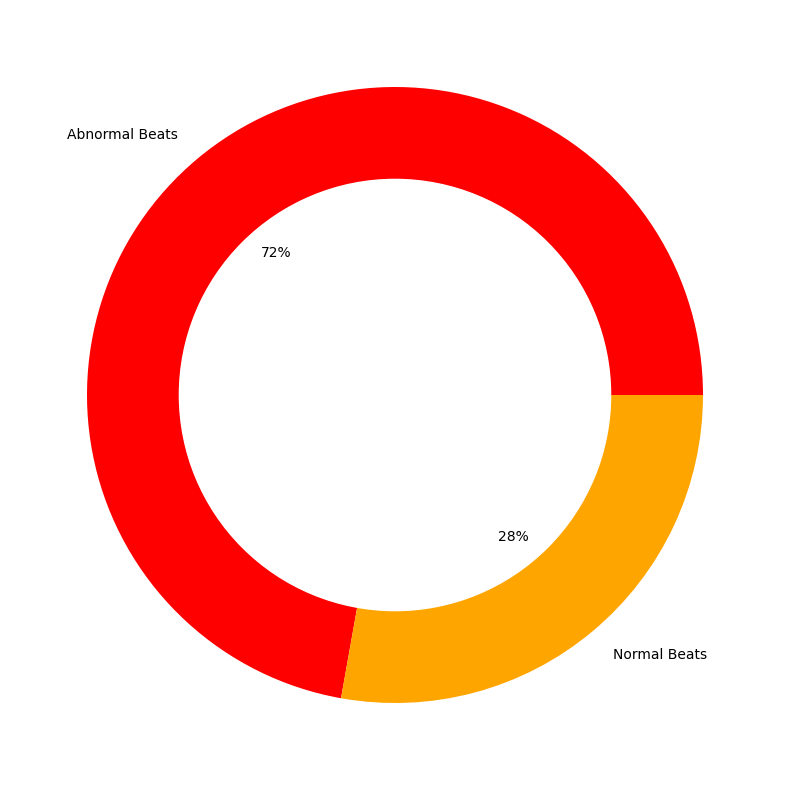

In [17]:

plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(df_abn_n[187].value_counts(), labels=['Abnormal Beats','Normal Beats',], autopct = '%0.0f%%', 
                                colors = ['red','orange'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Apply Supervised Learning

In [20]:
X1  = df_abn_n.iloc[:,:-1]
y1 = df_abn_n.iloc[:,-1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

Sampling Class

In [21]:
class Samplingdata:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def smote(self):
        smote = SMOTE(random_state=42, k_neighbors=3)#, n_jobs=-1
        X_smote, y_smote = smote.fit_resample(self.X, self.y)#type: ignore
        return X_smote, y_smote
    def tomek(self):
        tomek = TomekLinks()
        X_tomek, y_tomek = tomek.fit_resample(self.X, self.y)#type: ignore
        return X_tomek, y_tomek
    def smote_tomek(self):
        smt = SMOTETomek(random_state=42)
        X_smt, y_smt = smt.fit_resample(self.X, self.y)#type: ignore
        return X_smt, y_smt

Model Class

In [22]:
class Model:
    def __init__ (self, model, X_train, X_test, y_train, y_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    def model_fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    def model_report(self, y_pred, y_test):
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred, normalize='true')
        classification = classification_report(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1Score = f1_score(y_test, y_pred, average='weighted')
        return accuracy, confusion, classification, recall, precision, f1Score
    def model_pred(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred

Draw_confusion

In [52]:
class ReportModel:
    def __init__(self, confusion_mat, model_name, smpl_name, model_accu, model_precision, model_recall, model_F1, model_cl_report):
        self.confusion_mat = confusion_mat
        self.model_name = model_name
        self.smpl_name = smpl_name
        self.model_accu = model_accu
        self.model_precision = model_precision
        self.model_recall = model_recall
        self.model_F1 = model_F1
        self.model_cl_report = model_cl_report
    def draw_conf(self, confusion_mat, model_name, smpl_name):
        plt.figure(figsize=(8,5))
        sns.heatmap(confusion_mat, annot=True, linewidths=0.01, fmt = '0.3f')
        plt.title(f"{model_name} {smpl_name} Confusion Matrix")
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()
    def print_report(self):
        print(f"accuracy is: {self.model_accu}")
        print(f"Precision: {self.model_precision}")
        print(f"Recall: {self.model_recall}")
        print(f"F1_Score: {self.model_F1}")
        print(f"classification:\n {self.model_cl_report}")

Sampling X,y

In [25]:
X1_oversample, y1_oversample = Samplingdata(X1, y1).smote()
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X1_oversample, y1_oversample, test_size=0.2, random_state=42, stratify=y1_oversample)

In [26]:
X1_undersample, y1_undersample = Samplingdata(X1, y1).tomek()
X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek = train_test_split(X1_undersample, y1_undersample, test_size=0.2, random_state=42, stratify=y1_undersample)

In [27]:
X1_Smotek, y1_Smotek = Samplingdata(X1, y1).smote_tomek()
X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek = train_test_split(X1_Smotek, y1_Smotek, test_size=0.2, random_state=42, stratify=y1_Smotek)

Logistic Regression

In [28]:
model_logistic_reg = LogisticRegression(random_state=42, max_iter=100, multi_class='auto', solver='liblinear')

In [29]:
MyModel1 = Model(model_logistic_reg, X_train_smote, X_test_smote, y_train_smote, y_test_smote)
MyModel1.model_fit(X_train_smote,  y_train_smote)

In [30]:
prediction1 = MyModel1.model_pred(X_test_smote)
model_accu_1, model_con_mat_1, model_cl_report_1, model_recall_1, model_precision_1, model_F1_1 = MyModel1.model_report(prediction1, y_test_smote)

In [70]:
log_reg_m1 =  ReportModel(model_con_mat_1, 'Logistic Regression', 'SMOTE', model_accu_1, model_precision_1, model_recall_1, model_F1_1, model_cl_report_1)

In [71]:
log_reg_m1.print_report(model_accu_1, model_precision_1, model_recall_1, model_F1_1, model_cl_report_1)#type: ignore


accuracy is: 0.7989531287175827
Precision: 0.8003018402072077
Recall: 0.7989531287175827
F1_Score: 0.7987249989249516
classification:
               precision    recall  f1-score   support

         0.0       0.78      0.83      0.81      2102
         1.0       0.82      0.77      0.79      2101

    accuracy                           0.80      4203
   macro avg       0.80      0.80      0.80      4203
weighted avg       0.80      0.80      0.80      4203



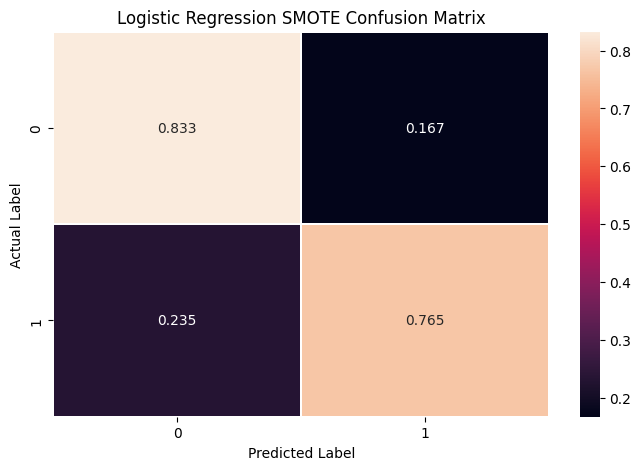

In [72]:
log_reg_m1.draw_conf(model_con_mat_1, 'Logistic Regression', 'SMOTE')

In [39]:
Model2 = Model(model_logistic_reg, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model2.model_fit(X_train_smotek, y_train_smotek)

In [40]:
prediction2 = Model2.model_pred(X_test_smotek)
model_accu_2, model_con_mat_2, model_cl_report_2, model_recall_2, model_precision_2, model_F1_2 = Model2.model_report(prediction2, y_test_smotek)

In [73]:
log_reg_m2 = ReportModel(model_con_mat_2, 'Logistic Regression', 'SMOTE_TOMEK', model_accu_2, model_precision_2, model_recall_2, model_F1_2, model_cl_report_2)

In [74]:
log_reg_m2.print_report(model_accu_2, model_precision_2, model_recall_2, model_F1_2, model_cl_report_2)#type: ignore

accuracy is: 0.8025720409621339
Precision: 0.8033283897781416
Recall: 0.8025720409621339
F1_Score: 0.8024473345111556
classification:
               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      2100
         1.0       0.82      0.78      0.80      2099

    accuracy                           0.80      4199
   macro avg       0.80      0.80      0.80      4199
weighted avg       0.80      0.80      0.80      4199



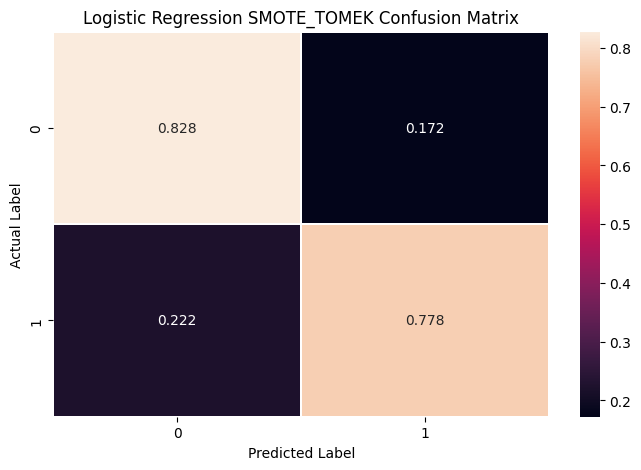

In [75]:
log_reg_m2.draw_conf(model_con_mat_2, 'Logistic Regression', 'SMOTE_TOMEK')

Decision Tree

In [43]:
model_decision_tree = DecisionTreeClassifier(random_state=0)

In [44]:
Model3 = Model(model_decision_tree, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model3.model_fit(X_train_smotek,  y_train_smotek)

In [47]:
prediction3 = Model3.model_pred(X_test_smotek)
model_accu_3, model_con_mat_3, model_cl_report_3, model_recall_3, model_precision_3, model_F1_3 = Model3.model_report(prediction3, y_test_smotek)

In [76]:
DT_m3 = ReportModel(model_con_mat_3, 'Decision Tree', 'SMOTE_TOMEK', model_accu_3, model_precision_3, model_recall_3, model_F1_3, model_cl_report_3)

In [77]:
DT_m3.print_report(model_accu_3, model_precision_3, model_recall_3, model_F1_3, model_cl_report_3)#type: ignore

accuracy is: 0.9337937604191474
Precision: 0.9340017584556936
Recall: 0.9337937604191474
F1_Score: 0.9337856411436799
classification:
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2100
         1.0       0.94      0.92      0.93      2099

    accuracy                           0.93      4199
   macro avg       0.93      0.93      0.93      4199
weighted avg       0.93      0.93      0.93      4199



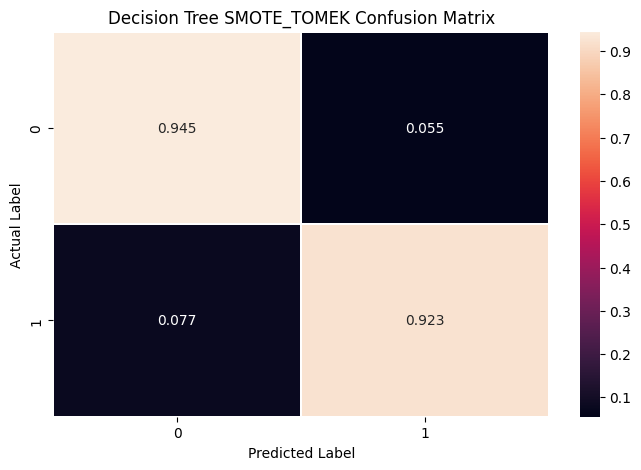

In [78]:
DT_m3.draw_conf(model_con_mat_3, 'Decision Tree', 'SMOTE_TOMEK')

k-nearest

In [67]:
model_k_nearest = KNeighborsClassifier(n_jobs=-1)

In [68]:
Model4 = Model(model_k_nearest, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model4.model_fit(X_train_smotek, y_train_smotek)

In [69]:
prediction4 = Model4.model_pred(X_test_smotek)
model_accu_4, model_con_mat_4, model_cl_report_4, model_recall_4, model_precision_4, model_F1_4 = Model4.model_report(prediction4, y_test_smotek)

In [79]:
knn_m4 = ReportModel(model_con_mat_4, 'Logistic Regression', 'SMOTE', model_accu_1, model_precision_1, model_recall_1, model_F1_1, model_cl_report_1)

In [80]:
knn_m4.print_report(model_accu_4, model_precision_4, model_recall_4, model_F1_4, model_cl_report_4)#type: ignore

accuracy is: 0.9466539652298166
Precision: 0.9504199039260716
Recall: 0.9466539652298166
F1_Score: 0.9465416115231019
classification:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      2100
         1.0       0.99      0.90      0.94      2099

    accuracy                           0.95      4199
   macro avg       0.95      0.95      0.95      4199
weighted avg       0.95      0.95      0.95      4199



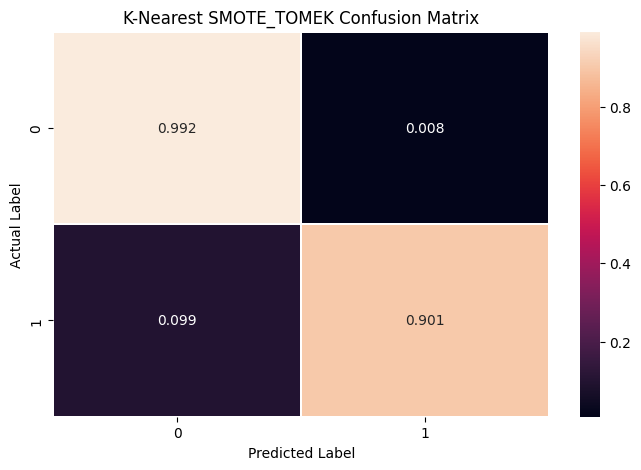

In [81]:
knn_m4.draw_conf(model_con_mat_4, 'K-Nearest', 'SMOTE_TOMEK')

Linear SVC

In [82]:
model_linear_svc = LinearSVC(random_state=42, max_iter=5000, dual = True)

In [83]:
Model5 = Model(model_linear_svc, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model5.model_fit(X_train_smotek, y_train_smotek)

In [84]:
prediction5 = Model5.model_pred(X_test_smotek)
model_accu_5, model_con_mat_5, model_cl_report_5, model_recall_5, model_precision_5, model_F1_5 = Model5.model_report(prediction5, y_test_smotek)

In [85]:
linear_svc_m5 = ReportModel(model_con_mat_5, 'Linear SVC', 'SMOTE_TOMEK', model_accu_5, model_precision_5, model_recall_5, model_F1_5, model_cl_report_5)

In [86]:
linear_svc_m5.print_report(model_accu_5, model_precision_5, model_recall_5, model_F1_5, model_cl_report_5)#type: ignore

accuracy is: 0.8035246487258871
Precision: 0.804636549616418
Recall: 0.8035246487258871
F1_Score: 0.8033433337122651
classification:
               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      2100
         1.0       0.82      0.77      0.80      2099

    accuracy                           0.80      4199
   macro avg       0.80      0.80      0.80      4199
weighted avg       0.80      0.80      0.80      4199



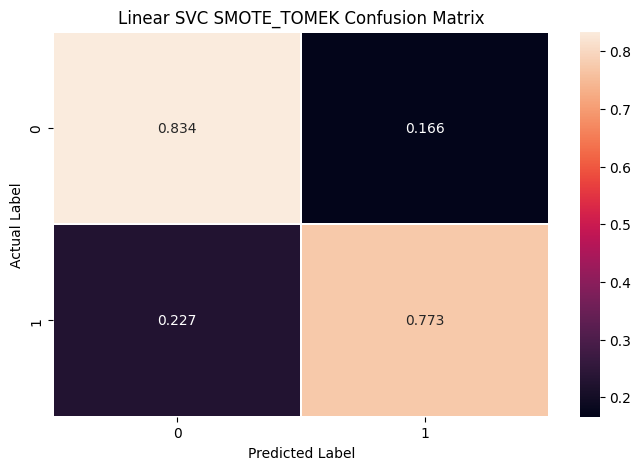

In [87]:
linear_svc_m5.draw_conf(model_con_mat_5, 'Linear SVC', 'SMOTE_TOMEK')

In [88]:
model_SVM = SVC(random_state=42)

In [89]:
Model6 = Model(model_SVM, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model6.model_fit(X_train_smotek, y_train_smotek)

In [90]:
prediction6 = Model6.model_pred(X_test_smotek)
model_accu_6, model_con_mat_6, model_cl_report_6, model_recall_6, model_precision_6, model_F1_6 = Model6.model_report(prediction6, y_test_smotek)

In [91]:
SVM_m6 = ReportModel(model_con_mat_6, 'SVM', 'SMOTE_TOMEK', model_accu_6, model_precision_6, model_recall_6, model_F1_6, model_cl_report_6)

In [92]:
SVM_m6.print_report(model_accu_6, model_precision_6, model_recall_6, model_F1_6, model_cl_report_6)#type: ignore

accuracy is: 0.9223624672541081
Precision: 0.9239371442950335
Recall: 0.9223624672541081
F1_Score: 0.9222896909923001
classification:
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2100
         1.0       0.95      0.89      0.92      2099

    accuracy                           0.92      4199
   macro avg       0.92      0.92      0.92      4199
weighted avg       0.92      0.92      0.92      4199



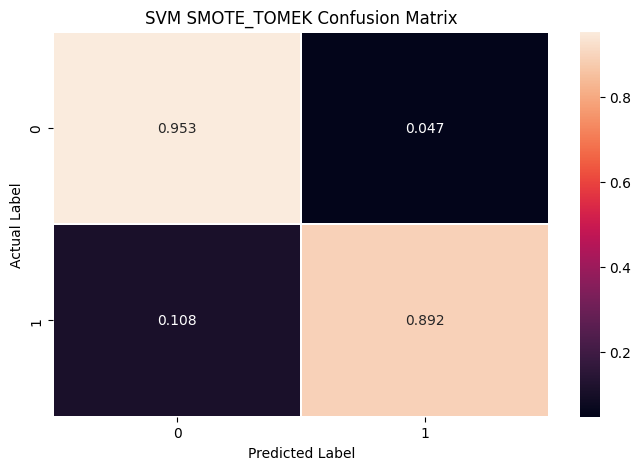

In [93]:
SVM_m6.draw_conf(model_con_mat_6, 'SVM', 'SMOTE_TOMEK')

# Apply Unsupervised Learning

In [94]:
df_features = df_abn_n.iloc[:,:-1]
df_classes = df_abn_n.iloc[:,-1]

In [95]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Columns: 187 entries, 0 to 186
dtypes: float64(187)
memory usage: 20.8 MB


In [96]:
df_classes.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14552 entries, 0 to 14551
Series name: 187
Non-Null Count  Dtype  
--------------  -----  
14552 non-null  float64
dtypes: float64(1)
memory usage: 113.8 KB


K-Means

In [102]:
kmeans = KMeans(n_clusters=2, random_state=42, init = 'k-means++')

In [103]:
classes = kmeans.fit_predict(df_features)

In [107]:
pca = PCA(n_components=2, random_state=42)

In [108]:
reduce_features = pca.fit_transform(df_features)

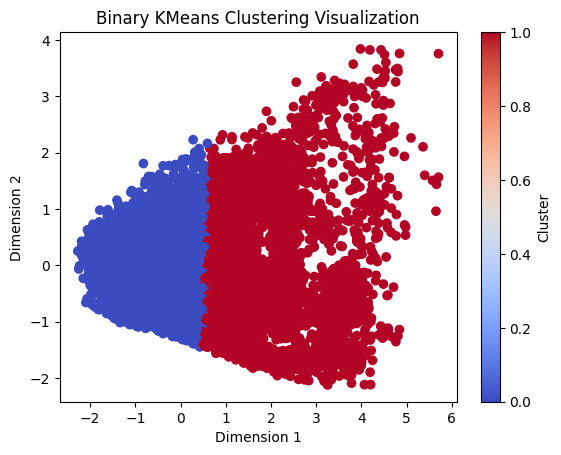

In [110]:
plt.scatter(reduce_features[:, 0], reduce_features[:, 1], c=classes, cmap='coolwarm')
plt.title('Binary KMeans Clustering Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

In [118]:
silhouette_avg = silhouette_score(df_features, classes)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2960067752996001


# Ensemble

Random Forest

In [114]:
model_random_forest = RandomForestClassifier(random_state=42)

In [115]:
Model7 = Model(model_random_forest, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model7.model_fit(X_train_smotek, y_train_smotek)

In [116]:
prediction7 = Model7.model_pred(X_test_smotek)
model_accu_7, model_con_mat_7, model_cl_report_7, model_recall_7, model_precision_7, model_F1_7 = Model7.model_report(prediction7, y_test_smotek)

In [119]:
randm_m7 = ReportModel(model_con_mat_7, 'Random Forest', 'SMOTE_TOMEK', model_accu_7, model_precision_7, model_recall_7, model_F1_7, model_cl_report_7)

In [120]:
randm_m7.print_report(model_accu_7, model_precision_7, model_recall_7, model_F1_7, model_cl_report_7)#type: ignore

accuracy is: 0.978328173374613
Precision: 0.9783673043571689
Recall: 0.978328173374613
F1_Score: 0.9783277062882179
classification:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2100
         1.0       0.98      0.97      0.98      2099

    accuracy                           0.98      4199
   macro avg       0.98      0.98      0.98      4199
weighted avg       0.98      0.98      0.98      4199



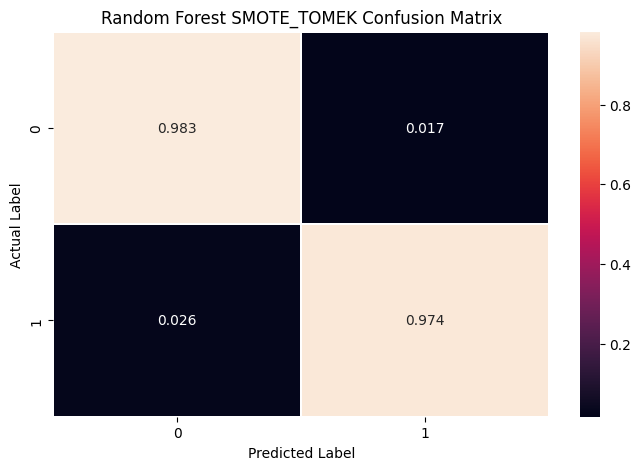

In [121]:
randm_m7.draw_conf(model_con_mat_7, 'Random Forest', 'SMOTE_TOMEK')

XGboost

In [122]:
model_xgboost = xgb.XGBClassifier()
Model8 = Model(model_xgboost, X_train, X_test, y_train, y_test)

In [123]:
Model8.model_fit(X_train, y_train)

In [124]:
predict_xgboost = Model8.model_pred(X_test)
accu_xgboost, con_mat_xgboost, cl_report_xgboost, recall_xgboost, precision_xgboost, F1_score_xgboost = Model8.model_report(predict_xgboost, y_test)

In [125]:
xgboost_m8 = ReportModel(con_mat_xgboost, 'XGBoost', 'Original', accu_xgboost, precision_xgboost, recall_xgboost, F1_score_xgboost, cl_report_xgboost)

In [126]:
xgboost_m8.print_report(accu_xgboost, precision_xgboost, recall_xgboost, F1_score_xgboost, cl_report_xgboost)#type: ignore

accuracy is: 0.9776709034695981
Precision: 0.9776062713026552
Recall: 0.9776709034695981
F1_Score: 0.9776062745420292
classification:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       810
         1.0       0.98      0.99      0.98      2101

    accuracy                           0.98      2911
   macro avg       0.97      0.97      0.97      2911
weighted avg       0.98      0.98      0.98      2911



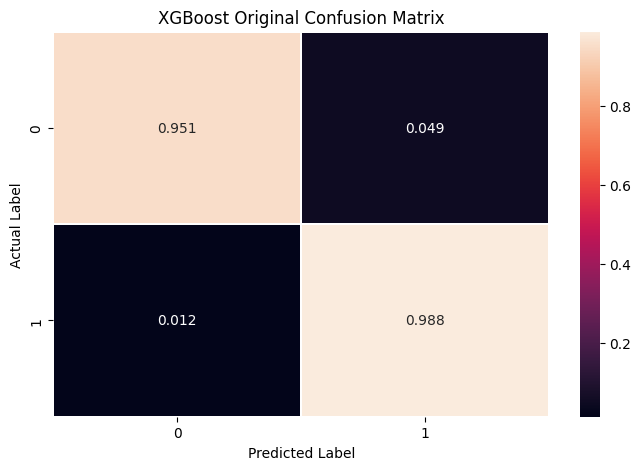

In [127]:
xgboost_m8.draw_conf(con_mat_xgboost, 'XGBoost', 'Original')